In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr, spearmanr # For correlation testing
from scipy.stats import t, ttest_ind
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("delhivery_data.csv")

In [3]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# 1. Basic data cleaning and exploration:

### 1. Analyze the structure of the data.

In [4]:
df.shape

(144867, 24)

In [5]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
df.describe(include="object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### 2. Handle missing values in the data.


In [8]:
df.isnull().sum()
# Missing values are in source_name and destination_name
# we can check 

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
## Condtion we created for this kind of missing values ##
# ********************************************************

# Splitted the data by missing values and count the number of missing values for each particular source_center
# Then for each source_center, check if there any matching values in source_center and source_center column of main data
# Calculate the number of missing count of each center and compare with whole data count if both are same then that particular data won't be anywhere in our dataset
# If the above condition is true we can drop the null values

#### Missing values check for source_name feature

In [10]:
miss_count = df[df['source_name'].apply(pd.isna)]["source_center"].value_counts().reset_index()
cant_modify = []
can_modify = []
for i in miss_count["index"]:
    if (df[df["source_center"] == f"{i}"]["source_name"].apply(pd.isna).sum() == miss_count[miss_count["index"] == f"{i}"]["source_center"].values[0]) and (df[df["source_center"] == f"{i}"]["source_name"].apply(pd.isna).sum() == df[df["source_center"] == f"{i}"].shape[0]):
        cant_modify.append(i)
    else:
        can_modify.append(i)
if can_modify == []:
    print("We can drop the rows of source_name which are having missing values, there is no way to assume any value there")

We can drop the rows of source_name which are having missing values, there is no way to assume any value there


#### Missing values check for source_name feature

In [11]:
miss_count = df[df['source_name'].apply(pd.isna)]["source_center"].value_counts().reset_index()
cant_modify = []
can_modify = []
for i in miss_count["index"]:
    if df[df["source_center"] == f"{i}"]["source_name"].apply(pd.isna).sum() == miss_count[miss_count["index"] == f"{i}"]["source_center"].values[0] and (df[df["source_center"] == f"{i}"]["source_name"].apply(pd.isna).sum() == df[df["source_center"] == f"{i}"].shape[0]):
        cant_modify.append(i)
    else:
        can_modify.append(i)
if can_modify == []:
    print("We can drop the rows of source_name which are having missing values, there is no way to assume any value there")

We can drop the rows of source_name which are having missing values, there is no way to assume any value there


In [12]:
# Dropping the missing values
df = df.dropna(axis=0)

In [13]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [14]:
# All missing values are dropped, there is no way to fill up with other values or with any aggregation values
# Hence we dropped missing values

### 3. Merging the rows

In [15]:
# Merging the rows with groupby of trip id, source center, destination center and aggregate sum by segment time and max by actual cumulative time
# So that the we can able to fetch data of source and destination with their actual time taken and total segment time taken

In [16]:
groupby_trip_source_dest = df.groupby(["trip_uuid","source_name","destination_name"]).agg(
    {
        "segment_actual_time":"sum",
        "segment_osrm_time":"sum",
        "segment_osrm_distance":"sum",
        "actual_time":"max",
        "osrm_time":"max",
        "osrm_distance":"max"
    }).reset_index()

In [17]:
merged_data = groupby_trip_source_dest.groupby("trip_uuid").agg(
    {
        "source_name":"first",
        "destination_name":"last",
        "segment_actual_time":"sum",
        "segment_osrm_time":"sum",
        "segment_osrm_distance":"sum",
        "actual_time":"sum",
        "osrm_time":"sum",
        "osrm_distance":"sum"
    }).reset_index()

In [18]:
merged_data

,trip_uuid,source_name,destination_name,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),1548.0,1008.0,1320.4733,1562.0,743.0,991.3523
1,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),141.0,65.0,84.1894,143.0,68.0,85.1110
2,trip-153671043369099517,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),3308.0,1941.0,2545.2678,3347.0,1741.0,2372.0852
3,trip-153671046011330457,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),59.0,16.0,19.8766,59.0,15.0,19.6800
4,trip-153671052974046625,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),340.0,115.0,146.7919,341.0,117.0,146.7918
...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),82.0,62.0,64.8551,83.0,62.0,73.4630
14783,trip-153861104386292051,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),21.0,11.0,16.0883,21.0,12.0,16.0882
14784,trip-153861106442901555,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),281.0,88.0,104.8866,282.0,54.0,63.2841
14785,trip-153861115439069069,Eral_Busstand_D (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),258.0,221.0,223.5324,264.0,184.0,177.6635


# 2. Build some features to prepare the data for actual analysis. Extract features from the below fields:

### 1. Destination Name: Split and extract features out of destination. City-place-code (State)

#### Seperator function to split

In [19]:
def seperator(x):
    res = x.split("_")
    if len(res) == 2:
        second_split = res[1].split(" ")
        res.pop()
        for i in second_split:
            res.append(i)
    elif len(res) == 1:
        third_split = res[0].split(" ")
        res.pop()
        for i in third_split:
            res.append(i)
        if len(res) <= 2:
            res.append(third_split[-1])
    return res if len(res) == 3 else res[:3]

In [20]:
df["destination_name"]

0         Khambhat_MotvdDPP_D (Gujarat)
1         Khambhat_MotvdDPP_D (Gujarat)
2         Khambhat_MotvdDPP_D (Gujarat)
3         Khambhat_MotvdDPP_D (Gujarat)
4         Khambhat_MotvdDPP_D (Gujarat)
                      ...              
144862    Gurgaon_Bilaspur_HB (Haryana)
144863    Gurgaon_Bilaspur_HB (Haryana)
144864    Gurgaon_Bilaspur_HB (Haryana)
144865    Gurgaon_Bilaspur_HB (Haryana)
144866    Gurgaon_Bilaspur_HB (Haryana)
Name: destination_name, Length: 144316, dtype: object

In [21]:
# Split the destination name column with "_" where we observerd this is the delimiter for destination name.
# Dropped the unwanted columns
# Appending the data to Main Dataframe
destination = pd.DataFrame(df["destination_name"].apply(seperator).tolist(), index=df.trip_uuid).reset_index()
destination.columns = ["id","City","Place","State"]
df["destination_city"] = destination["City"].to_numpy()
df["destination_place"] = destination["Place"].to_numpy()
df["destination_state"] = destination["State"].to_numpy()


### 2. Source Name: Split and extract features out of destination. City-place-code (State)

In [22]:
df["source_name"]

0         Anand_VUNagar_DC (Gujarat)
1         Anand_VUNagar_DC (Gujarat)
2         Anand_VUNagar_DC (Gujarat)
3         Anand_VUNagar_DC (Gujarat)
4         Anand_VUNagar_DC (Gujarat)
                     ...            
144862    Sonipat_Kundli_H (Haryana)
144863    Sonipat_Kundli_H (Haryana)
144864    Sonipat_Kundli_H (Haryana)
144865    Sonipat_Kundli_H (Haryana)
144866    Sonipat_Kundli_H (Haryana)
Name: source_name, Length: 144316, dtype: object

In [23]:
# Split the source name column with "_" where we observerd this is the delimiter for source name.
# Dropped the unwanted columns
# Appending the data to Main Dataframe
source = pd.DataFrame(df["source_name"].apply(seperator).tolist(), index=df.trip_uuid).reset_index()
source.columns = ["id","City","Place","Code"]
df["source_city"] = source["City"].to_numpy()
df["source_place"] = source["Place"].to_numpy()
df["source_code"] = source["Code"].to_numpy()

In [24]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
destination_city                  0
destination_place                 0
destination_state                 0
source_city                 

### 3. Trip_creation_time: Extract features like month, year and day etc

In [25]:
# First will convert the whole column into datetime dtype
# Then will split this into multiple features
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["Trip_Year"] = df["trip_creation_time"].dt.year
df["Trip_Month"] = df["trip_creation_time"].dt.month_name()
df["Trip_day"] = df["trip_creation_time"].dt.day

# 3. In-depth analysis and feature engineering:

### 1. Calculate the time taken between od_start_time and od_end_time and keep it as a feature.

In [26]:
# od_start_time – Trip start time
# od_end_time – Trip end time
# For calculating difference between od_start and od_end we can find out the original time taken by the order.
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])
df["time_diff_min"] = (df["od_end_time"] - df["od_start_time"]).dt.total_seconds()/60

### 2. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [27]:
# start_scan_to_end_scan – Time taken to deliver from source to destination
# time_diff_min - Calculated time diff by their actual timings

##### Hypothetical testing for calculated timing and actual timing

In [28]:
# H0: Both are not correlated
# Ha: Both are correlated

## properties of two variables ##
# 1. Both features are continuous variables
# 2. Data is right skewed in nature

## Correlation Testing ##
alpha = 0.05
corr_stat, p_value = pearsonr(df["start_scan_to_end_scan"], df["time_diff_min"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",corr_stat)
print("P_value:",p_value)

Reject Null Hypothesis
Test Statistic Value:  0.9999999609905782
P_value: 0.0


<AxesSubplot:xlabel='time_diff_min', ylabel='start_scan_to_end_scan'>

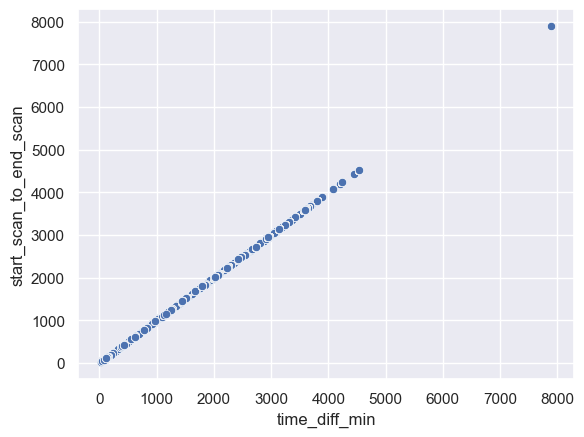

In [29]:
sns.scatterplot(data=df,x="time_diff_min", y="start_scan_to_end_scan")

In [30]:
# Inference
# Both features are highly correlated 
# Even test confirm the same and graph also tells the same
# Our calculated timings and actual timings both are same there is high colinearity
# we have created a another feature with 95 % confident

### 3. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

##### Hypothesis Testing for actual_time aggregated value and OSRM time aggregated value

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

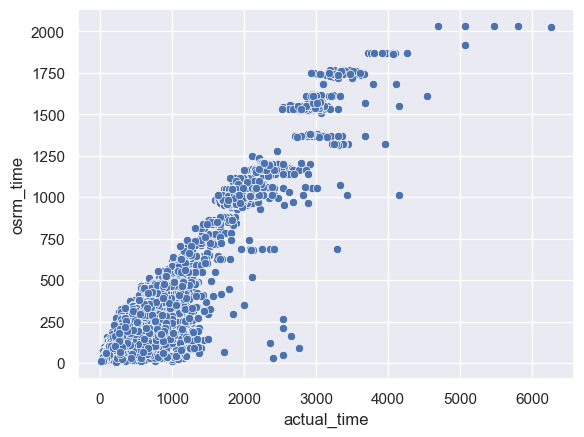

In [31]:
# Lets calculate this with visual analysis
# Both data is continuous. Hence will use scatter plot to analyze
sns.scatterplot(data=merged_data,x="actual_time",y="osrm_time")

<AxesSubplot:xlabel='route_type', ylabel='osrm_time'>

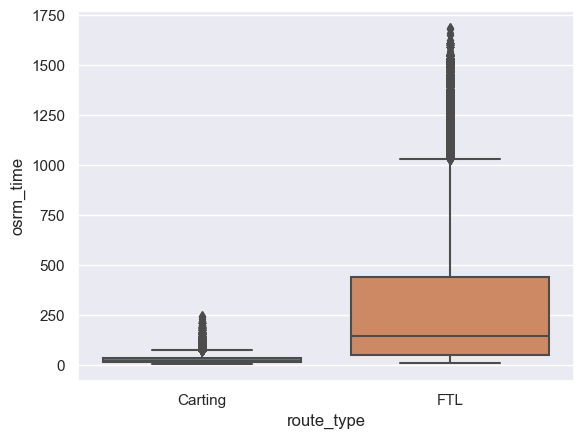

In [32]:
sns.boxplot(data=df,x="route_type",y="osrm_time")

<AxesSubplot:xlabel='route_type', ylabel='actual_time'>

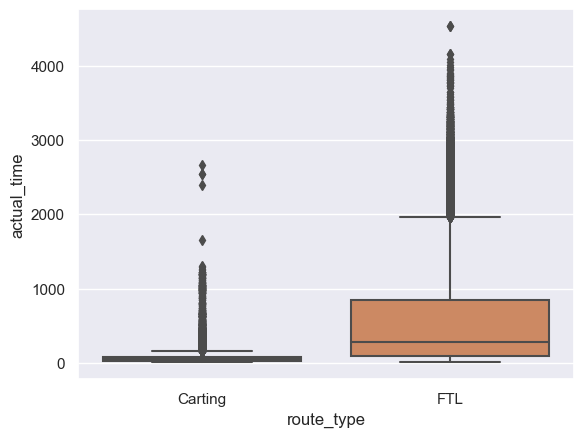

In [33]:
sns.boxplot(data=df,x="route_type",y="actual_time")

<AxesSubplot:xlabel='osrm_time', ylabel='Count'>

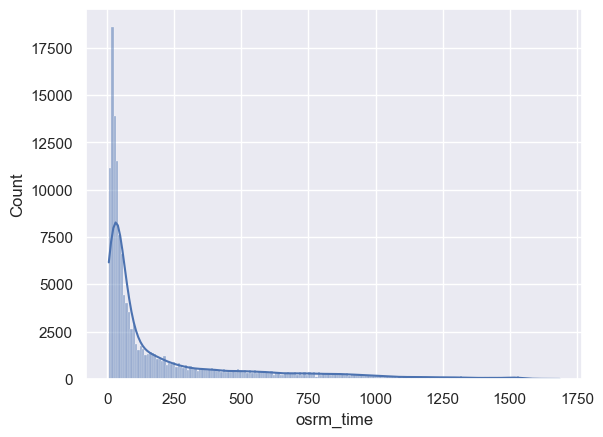

In [34]:
sns.histplot(data=df,x="osrm_time",kde=True)

In [35]:
# Inference of Visual Plot

# Plot is look like positive correlation between those variables
# But looks like there is some outliers are present in data
# Anyhow lets test our data to hypothetical testing

In [36]:
# H0: Both are not correlated
# Ha: Both are correlated

## properties of two variables ##
# 1. Both features are continuous variables
# 2. Data is right skewed in nature
# 3. There is lots of outliers are there 

## Correlation Testing ##
alpha = 0.05
corr_stat, p_value = pearsonr(merged_data["actual_time"], merged_data["osrm_time"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",corr_stat)
print("P_value:",p_value)

Reject Null Hypothesis
Test Statistic Value:  0.9587749744242271
P_value: 0.0


In [37]:
# Test_Results
# 1. There is a high correlation between these variables
# 2. Visually also its proved and hypothetically also its proved 
# 3. The actual time and open-source routing engine timings both are same

### 4. Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

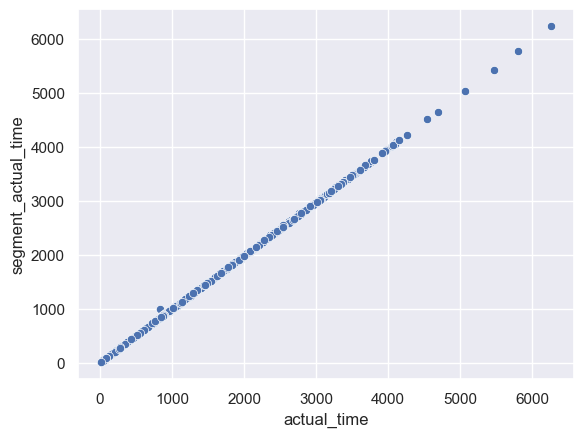

In [38]:
# Visual Analysis
sns.scatterplot(data=merged_data,x="actual_time",y="segment_actual_time")

# From ploting we can find out the both actual time and segment actual time are almost same
# There is high correlation between these variables

<AxesSubplot:xlabel='actual_time', ylabel='Count'>

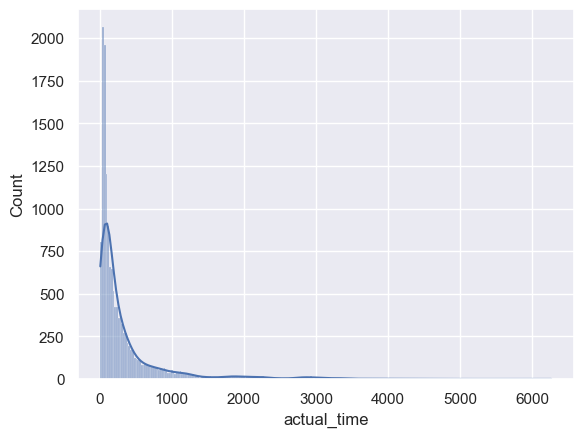

In [39]:
sns.histplot(data=merged_data,x="actual_time",kde=True)

<AxesSubplot:xlabel='segment_actual_time', ylabel='Count'>

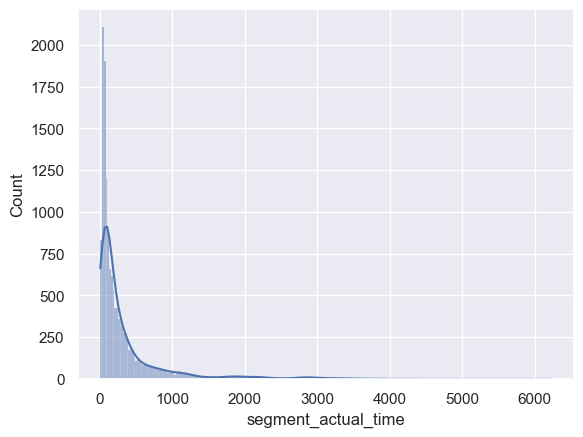

In [40]:
sns.histplot(data=merged_data,x="segment_actual_time",kde=True)

In [58]:
# H0: Both are not correlated
# Ha: Both are correlated

## properties of two variables ##
# 1. Both features are continuous variables
# 2. Data is right skewed in nature
# 3. There is lots of outliers are there 

## Correlation Testing ##
alpha = 0.05
corr_stat, p_value = ttest_ind(merged_data["actual_time"], merged_data["segment_actual_time"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",corr_stat)
print("P_value:",p_value)

Fail to reject Null Hypothesis
Test Statistic Value:  0.499475764573994
P_value: 0.6174479719707524


In [42]:
# Test_Results
# 1. There is a high correlation between these variables
# 2. Visually also its proved and hypothetically also its proved 
# 3. The actual time and segment_actual_time both are same

### 5. Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

<AxesSubplot:xlabel='segment_osrm_distance', ylabel='Count'>

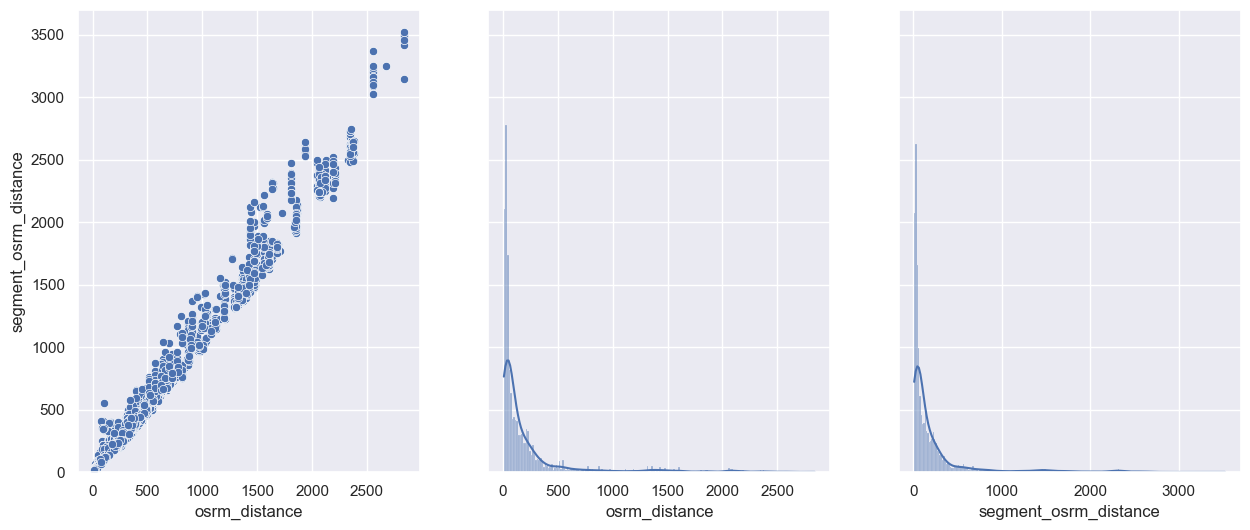

In [43]:
# Visual Analysis
fig, axes = plt.subplots(1,3,figsize=(15,6), sharey=True)
sns.scatterplot(ax= axes[0], data=merged_data,x="osrm_distance",y="segment_osrm_distance")

sns.histplot(ax= axes[1], data=merged_data,x="osrm_distance",kde=True)

sns.histplot(ax= axes[2], data=merged_data,kde=True,x="segment_osrm_distance")

# From ploting we can find out the both osrm_distance and segment_osrm_distance are almost same
# There is high correlation between these variables

In [59]:
# H0: Both are not correlated
# Ha: Both are correlated

## properties of two variables ##
# 1. Both features are continuous variables
# 2. Data is right skewed in nature
# 3. There is lots of outliers are there 

## Correlation Testing ##
alpha = 0.05
corr_stat, p_value = ttest_ind(merged_data["osrm_distance"], merged_data["segment_osrm_distance"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",corr_stat)
print("P_value:",p_value)

Reject Null Hypothesis
Test Statistic Value:  -3.937420853623222
P_value: 8.255072509709287e-05


In [45]:
# Test_Results
# 1. There is a high correlation between these variables
# 2. Visually also its proved and hypothetically also its proved 
# 3. The actual time and open-source routing engine timings both are same

### 6. Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

<AxesSubplot:xlabel='osrm_time', ylabel='Count'>

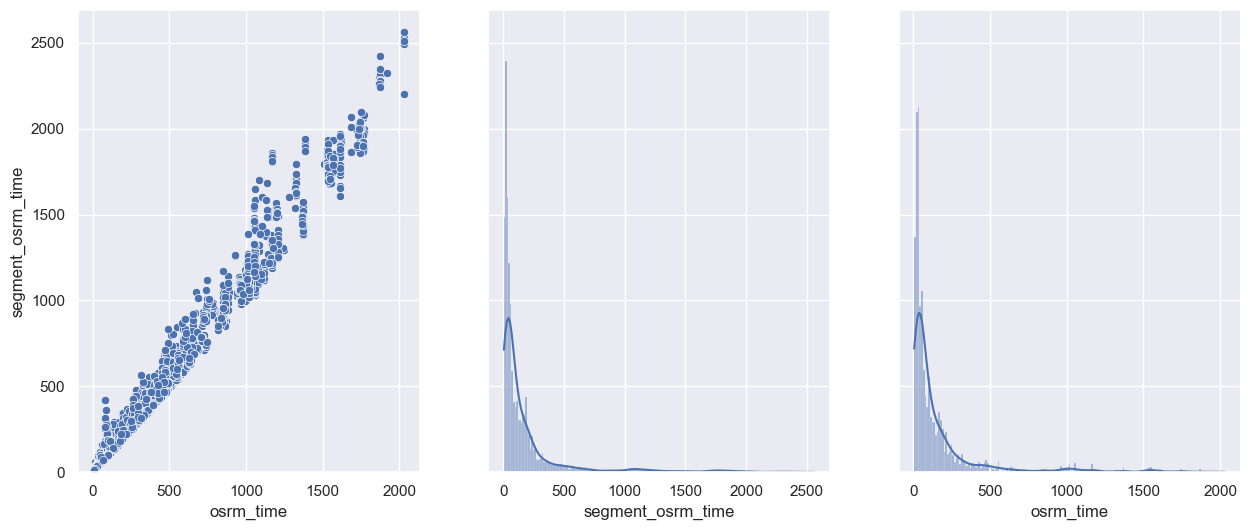

In [46]:
# Visual Analysis
fig, axes = plt.subplots(1,3,figsize=(15,6), sharey=True)
sns.scatterplot(ax= axes[0], data=merged_data,x="osrm_time",y="segment_osrm_time")

sns.histplot(ax= axes[1], data=merged_data,x="segment_osrm_time",kde=True)

sns.histplot(ax= axes[2], data=merged_data,kde=True,x="osrm_time")

# From ploting we can find out the both osrm_time and segment_osrm_time are almost same
# There is high correlation between these variables

In [60]:
# H0: Both are not correlated
# Ha: Both are correlated

## properties of two variables ##
# 1. Both features are continuous variables
# 2. Data is right skewed in nature
# 3. There is lots of outliers are there 

## Correlation Testing ##
alpha = 0.05
corr_stat, p_value = ttest_ind(merged_data["osrm_time"], merged_data["segment_osrm_time"])
if p_value<alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print("Test Statistic Value: ",corr_stat)
print("P_value:",p_value)

Reject Null Hypothesis
Test Statistic Value:  -5.505014892530727
P_value: 3.7220036379152134e-08


In [48]:
# Test_Results
# 1. There is a high correlation between these variables
# 2. Visually also its proved and hypothetically also its proved 
# 3. The osrm_time and segment_osrm_time both are same

### 7. Find outliers in the numerical variables

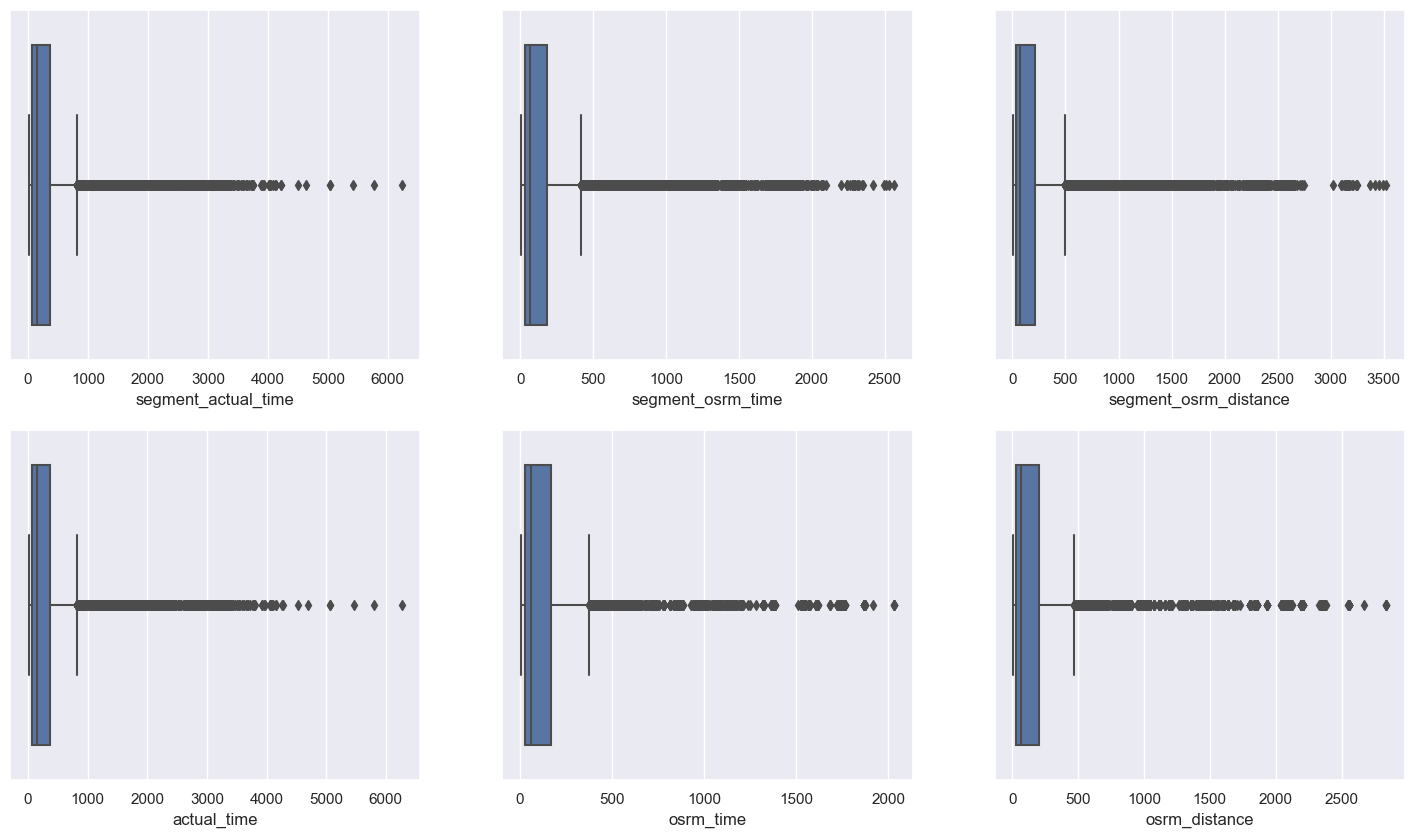

In [49]:
numerical_variable = ["segment_actual_time"	,"segment_osrm_time", "segment_osrm_distance","actual_time","osrm_time","osrm_distance"]
fig, axes = plt.subplots(2,3, figsize=(18,10))
for i in range(len(numerical_variable)):
    if i < 3:
        sns.boxplot(ax = axes[0,i], data = merged_data, x = numerical_variable[i])
    else:
        i -= 3
        sns.boxplot(ax = axes[1,i], data = merged_data, x = numerical_variable[i+3])

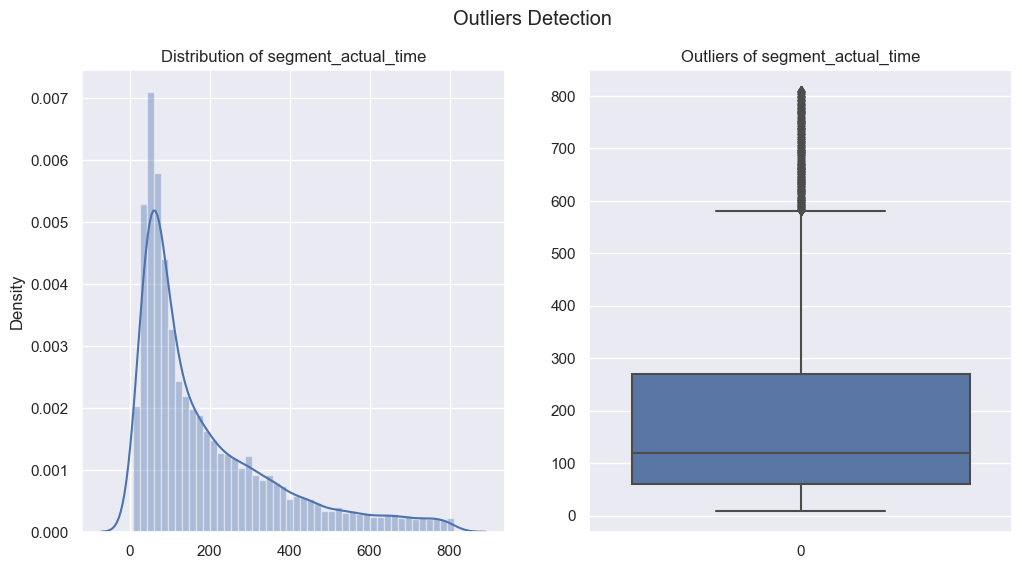

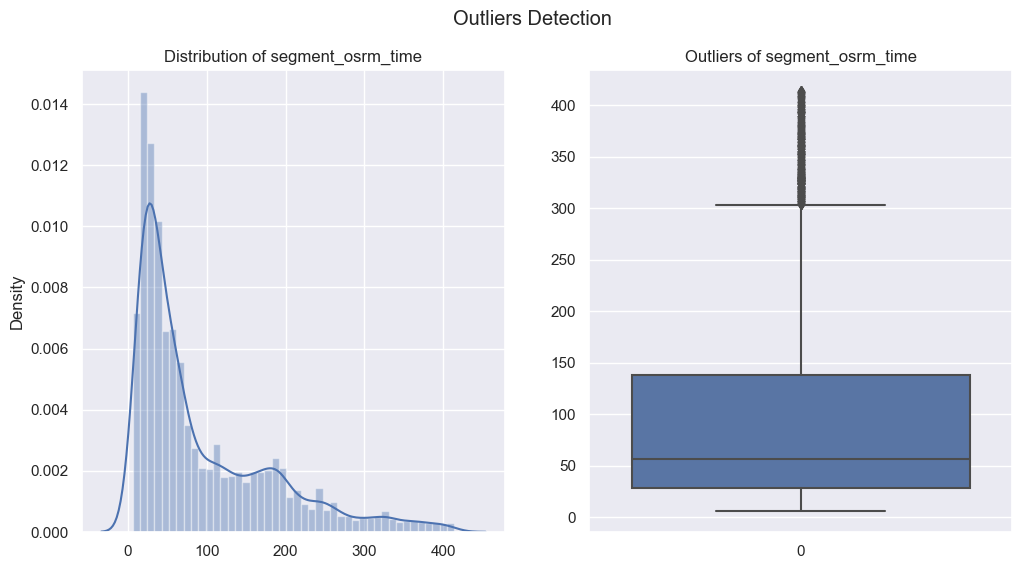

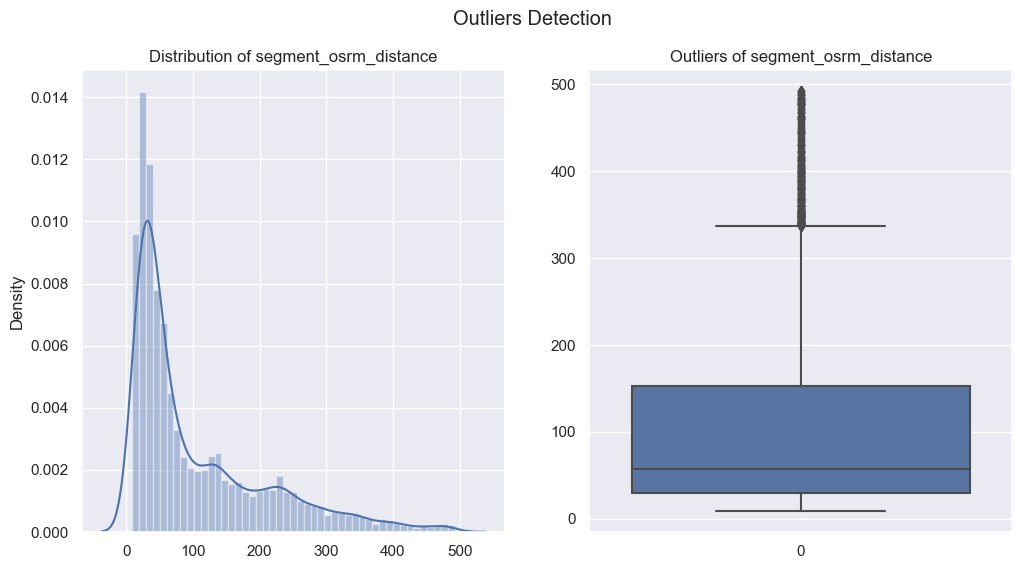

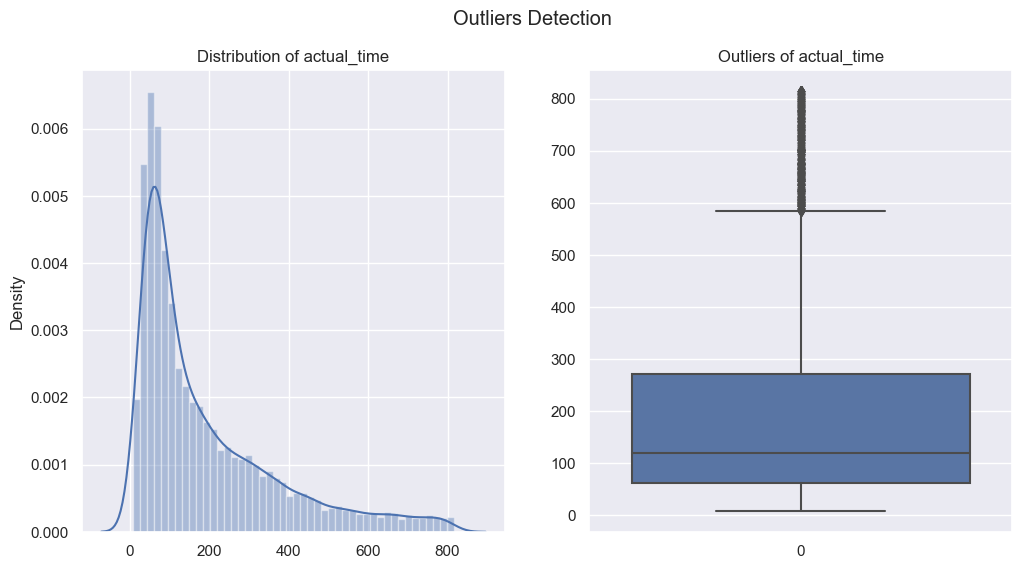

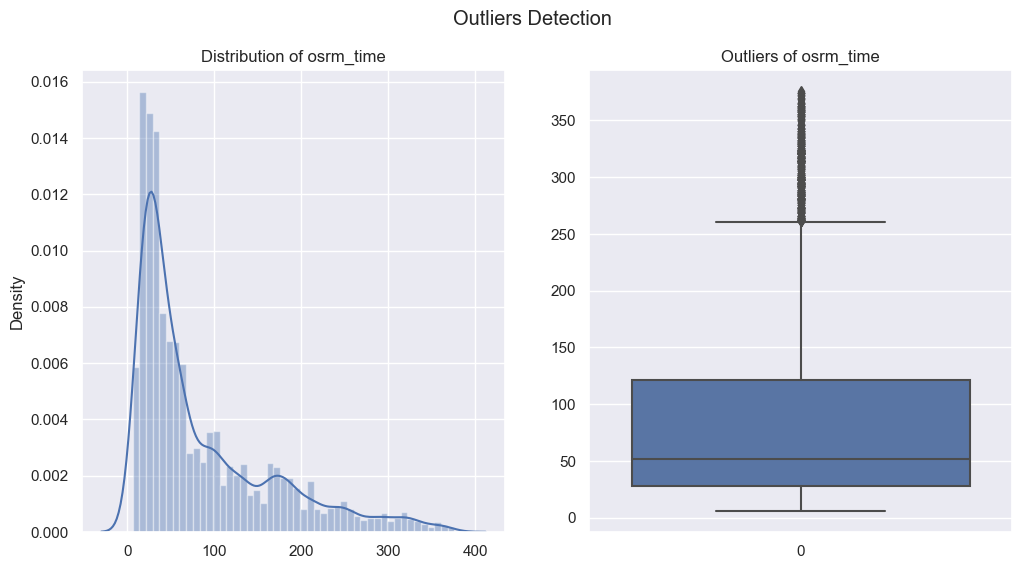

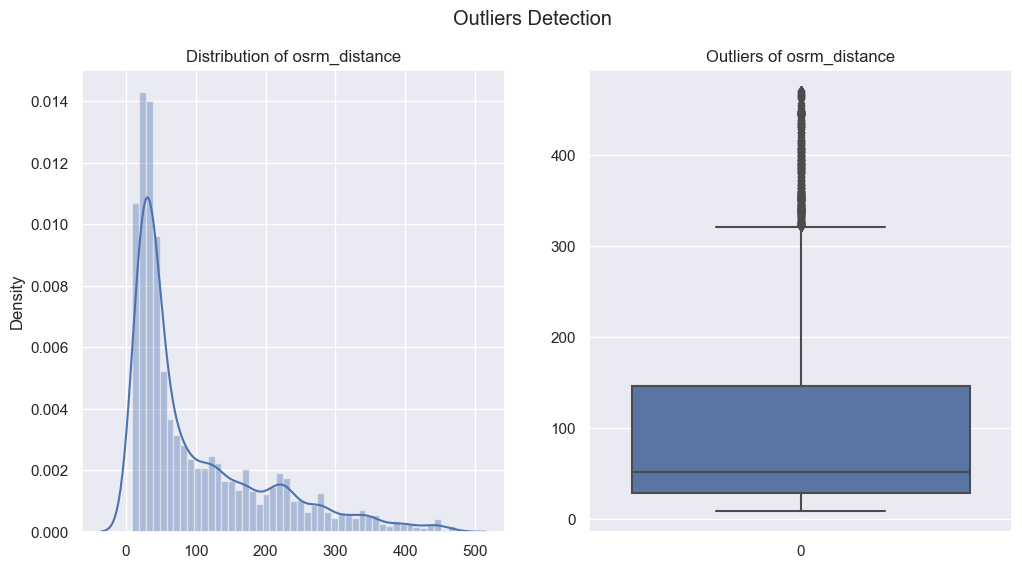

In [50]:
numerical_variable = ["segment_actual_time"	,"segment_osrm_time", "segment_osrm_distance","actual_time","osrm_time","osrm_distance"]
for i in range(len(numerical_variable)):
    upper = merged_data[numerical_variable[i]].quantile(.75)
    lower = merged_data[numerical_variable[i]].quantile(.25)
    iqr = upper - lower
    upper_limit = upper + 1.5 * iqr
    lower_limit = lower - 1.5 * iqr

    #Non_outlier data
    non_outlier_data = np.array(merged_data[(merged_data[numerical_variable[i]] < upper_limit) & (merged_data[numerical_variable[i]] > lower_limit)][numerical_variable[i]]).reshape(1,-1)
    # Even though we have filtered outliers based on IQR range
    # But data still have outliers values, this can be ignorable

    fig, axes = plt.subplots(1,2, figsize=(12,6))
    fig.suptitle("Outliers Detection")
    sns.distplot(ax = axes[0],a=non_outlier_data)
    axes[0].set_title(f"Distribution of {numerical_variable[i]}")
    sns.boxplot(ax = axes[1],data = non_outlier_data)
    axes[1].set_title(f"Outliers of {numerical_variable[i]}")


# Inference
# Even we have filtered outliers based on IQR range
# There is some outliers present in data this can't be removed or fileterd again

### 8. One hot Encoding for Categorical variable

In [51]:
# Figuring out the categorical variable
df.nunique().reset_index()

# route_type and is_cutoff is the teo categorical variable
# Let's do OneHot encoding for those
dummies = pd.get_dummies(df.route_type)
df = pd.concat([df,dummies],axis=1)

### 9. Normalize/ Standardize the numerical features

In [52]:
numerical_variable = ["segment_actual_time"	,"segment_osrm_time", "segment_osrm_distance","actual_time","osrm_time","osrm_distance"]

# Initialize standard scaler
standard = StandardScaler()
data_fornormalize = df.copy()
data_fornormalize[numerical_variable] = standard.fit_transform(data_fornormalize[numerical_variable])


In [53]:
# Initialize standard scaler
MinMax = MinMaxScaler()
data_forMinmax = df.copy()
data_forMinmax[numerical_variable] = MinMax.fit_transform(data_forMinmax[numerical_variable])

In [54]:
df.groupby(["trip_uuid","source_name","destination_name"])["actual_distance_to_destination", "actual_time"].mean().reset_index().sort_values(by="actual_time",ascending=False).head(50)

,trip_uuid,source_name,destination_name,actual_distance_to_destination,actual_time
9199,trip-153733174477629450,Gurgaon_Bilaspur_HB (Haryana),MAA_Poonamallee_HB (Tamil Nadu),1722.045544,3051.000000
13178,trip-153759174280800288,Bangalore_Nelmngla_H (Karnataka),Bhopal_Trnsport_H (Madhya Pradesh),1129.605094,2625.000000
24023,trip-153843695443252828,Pappadahandi_Central_DPP_2 (Orissa),Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),196.451691,2541.000000
14438,trip-153768779707932330,Dalhousie_Banikhet_D (Himachal Pradesh),Chamba_Bangotu_D (Himachal Pradesh),18.057552,2491.000000
12854,trip-153757673070653230,Delhi_Airport_H (Delhi),Bhiwandi_Mankoli_HB (Maharashtra),1113.941516,2464.000000
9420,trip-153736469866480991,Gurgaon_Bilaspur_HB (Haryana),Kolkata_Dankuni_HB (West Bengal),671.847200,2457.766667
5217,trip-153705652749826759,Delhi_Airport_H (Delhi),Bhiwandi_Mankoli_HB (Maharashtra),1113.998070,2351.000000
21597,trip-153821802957864106,Ashokngr_Bypassrd_D (Madhya Pradesh),Guna_Raghogrh_D (Madhya Pradesh),54.498921,2281.000000
9973,trip-153739492878697753,Gurgaon_Bilaspur_HB (Haryana),Kolkata_Dankuni_HB (West Bengal),681.982047,2191.864407
25657,trip-153858876340944305,Gurgaon_Bilaspur_HB (Haryana),Bangalore_Nelmngla_H (Karnataka),858.745757,2180.779221


# Business Insights

In [55]:
# Most of the orders are packed from haryana,Karnataka,maharashtra, Telangana, Uttar pratesh
# Order packed from major cities are Gurgaon, Bangalore, Bhiwandi, Pune, Hyderabad
# Less number of orders are packed in the states of eastern india and Delhi, goa
# Orders packed in least city was Bhadra, jetpur, krishnanagar, etc.
# Most people ordered from Haryana, Karnataka, Maharashtra, Delhi, Telangana
# Eastern side of india people was not ordered that much in delhivery
# Hills side area have taken more time to delivery, there are multiple dependencies
# The delhivery almost delivery all the products equal to open source time calculator
# Even there is no difference beteen delhivery distance and OSRM distance, logistics are travelling in correct way and there is no scam happened
# there are some outliers in data, which tells that delhivery delivered some products in extreme condition also


# Recommendations

In [56]:
# Delhivery is faster in major cities, if they develop their business to tier-3 cities, it will helpfull to increase business growth
# In some places the intermediate time taken between two cities have taking more than usual timings, which delhivery should take care
# Several condition delhivery logistics, but there rare cases where delhivery makes to deliver products as soon as possible 